# Ensemble Learning<a id="Top"></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
Table of Content
    
<ul>
<li>1. <a href="#Part_1">Prelude: Tossing a biased coin</a></li>
<li>2. <a href="#Part_2">Ensemble Learning</a></li>
    <ul>
        <li>2.1 <a href="#Part_2_1">Voting classifiers</a></li>
        <li>2.2 <a href="#Part_2_2">Bagging and Pasting</a></li>
        <li>2.3 <a href="#Part_2_3">Boosting</a></li>
        <li>2.4 <a href="#Part_2_4">Stacking</a></li>
    </ul>    
</font>
</div>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Define overall figure size. Use the Golden ratio to compute width and height.
height = 6.0
width = height*0.5*(1.0+np.sqrt(5.0))

plt.rcParams['figure.figsize'] = (width, height)

# Instanciate the random number generator
np.random.seed(seed=0)
rnd = np.random.random

## 1. Prelude: Tossing a biased coin<a id="Part_1"></a>
<a href="#Top">Back to page top</a>

Fair coin tossing is a classic example in probability theory and statistics. Now instead of a fair coin, let us assume we have a biased one: the coin has a __51%__ chance of coming up heads, and __49%__ chance of coming up tails. Now we want to asking the following question: __what is the probability of getting a majority of heads after $n$ tosses__? 

Probability theory tells that the distribution of the number of heads $k$ in a sequence of $n$ tosses is given by the binomial probability mass distribution:

$$ 
    P(k, n, p) = \left(\begin{array}{c} n \\ k\end{array}\right)\,p^k\,(1-p)^{(n-k)}.
$$

Here $p$ and $1-p$ is the probability of coming up heads and tails respectively. In our example, $p=0.51$. The Scipy library <tt>scipy.stats</tt> has a built-in function <tt>binom.pmf(k,n,p)</tt> that returns $P(k, n, p)$. Let's calculate the probability of having $k=0$, 1, 2, $\ldots$, 6 heads after six tosses:

 Probility of having   0 heads:  0.01384
 Probility of having   1 heads:  0.08644
 Probility of having   2 heads:  0.22491
 Probility of having   3 heads:  0.31213
 Probility of having   4 heads:  0.24365
 Probility of having   5 heads:  0.10144
 Probility of having   6 heads:  0.01760


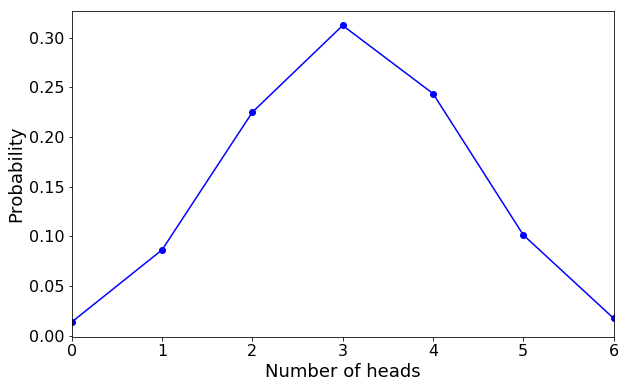

In [7]:
p = 51./100.
num_toss = 6
phead = []
for i in range(num_toss+1):
    f = binom.pmf(i, num_toss, p)
    phead.append(f)
    print(' Probility of having {0:3d} heads: {1:8.5f}'.format(i, f))
    
plt.plot(range(num_toss+1), phead, 'bo-')    
plt.xlabel('Number of heads', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.xlim(0,num_toss)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()   

The distribution is not symmetric around $n=3$: the probability of having 4 heads is slightly bigger than that of coming up with 4 tails, and so on. This, of course, is the result of having a biased coin.

Following this example, we can now answer the question: __what is the probability of getting a majority of heads after $n$ tosses__? This is just the sum of probability mass function $P(k,n,p)$ for $k > n/2$. Now let us plot the answer as a function of the number of tosses up to $n=500$.

In [3]:
def ProbMajorHead(n, p):
    psum = 0.0
    for i in np.arange(n/2.+1., n+1., 1.):
        psum += binom.pmf(i, n, p)    
    return psum

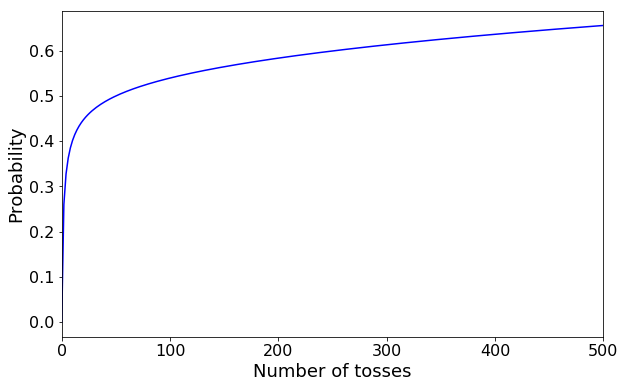

In [8]:
num_toss = 500
p = 51./100.
plist = []
for n in np.arange(0., num_toss+1, 2.):
    psum = ProbMajorHead(n, p)
    plist.append(psum)    
    
plt.plot(np.arange(0., num_toss+1, 2.), plist, 'b-')    
plt.xlabel('Number of tosses', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.xlim(0,num_toss)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()     

The probability starts out to be quite small at the beginning. But the more you toss, the higher the probability. For instance, for $n=10000$, the probability reaches 97.6%!

In [9]:
n = 10000
print(' Probability of getting a majority of heads after {0:6d} tosses is {1:8.5f}'.format(n, ProbMajorHead(n, p)))

 Probability of getting a majority of heads after  10000 tosses is  0.97672


The reason of the 97.6% probability is due to the law of large numbers. As one keeps tossing the coin, the ratio of heads will be getting closer and closer to 51%. The following code snippets plot the head ratio for the first $n=15000$ tosses.

In [10]:
# Define the biased coin with 51% probability of coming up heads,  49% of coming up tails.
def biased_coin():
    if rnd() >= 0.49:
        return 1.0
    else:
        return 0.0

def Plot_HeadRatio(num_exp, num_toss):
    ratio    = [[0 for x in range(num_toss)] for y in range(num_exp)]
    for iexp in range(num_exp):
        result = 0.0
        for itoss in range(num_toss):
            result += biased_coin()
            r = result / (itoss+1)
            #print("%6d   %.4f"%(i, r))
            ratio[iexp][itoss] = r

    # Plot the five experiment results
    c = ['k', 'b', 'g', 'm', 'y']
    for iexp in range(num_exp):
        plt.plot(ratio[iexp], ls='-', color=c[iexp])    
    plt.xlabel('Number of coin tosses', fontsize=18)
    plt.ylabel('Heads ratio', fontsize=18)
    plt.xlim(0,num_toss)
    plt.ylim(0.42, 0.58)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.hlines(0.50, 0, num_toss, colors='k', linestyles='solid', label="50%")
    plt.hlines(0.51, 0, num_toss, colors='r', linestyles='dotted', label="51%")
    plt.legend(fontsize=20)
    plt.show()

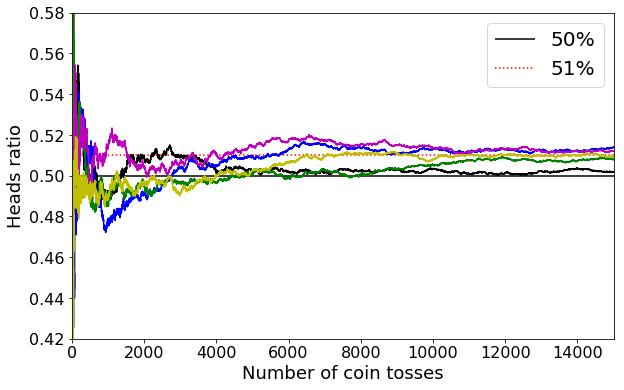

In [11]:
# number of coin toss experiments   
num_exp  = 5 
# number of tosses in each experiment
num_toss = 15000

Plot_HeadRatio(num_exp, num_toss)

As one can see, when $n$ gets large, the heads ratio is consistently above 50% for each sequence, and converges to 51% eventually.

__So what does the example of biased coin tossing tell us?__

Suppose we have a collection of classifiers that are individually correct 51% of the time. Then the coin toss example basically implies that if we build a majority-vote classifier using these rather weak classifiers, then this voting classifier can achieve a higher accuracy if we collect large enough number of weak classifiers. This of course assumes that the weak classifiers are perfectly independent. Nevertheless, this is the idea behind ensemble learning. Sometimes this is referred to as _**the wisdom of the crowd**_: __if you aggregate the predictions of a group of predictors, you will often end up getting better predictions than with the best individual predictor__.

## 2 Ensemble Learning<a id="Part_2"></a>
<a href="#Top">Back to page top</a>

As just mentioned, one can apply the philosophy of *the wisdom of the crowd* in machine learning. The resulting method is called ensemble learning. The idea is very straightford: train a diverse collection of predictors (can be classifiers, regressors, or neural networks) and aggregate the predictions. Depending on how the training is carried out and the way final prediction is generated, there are a couple different methods that one can choose from. In the following, we will use classifiers as the predictor. The same principle can be applied to other types of predictors. __The key to making ensemble learning work is the *diversity* of the set of predictors__.

### 2.1 Voting classifiers<a id="Part_2_1"></a>
<a href="#Top">Back to page top</a>

One of the simplest way of aggregating predictions is by voting. In this scenario, suppose we have trained a few classifiers: a Logistic Regression classifier, an SVM classifier, a Random Forrest classifier, and a k-Nearest Neighbors classifier. Then the final outcome will be the one that gets the most votes from the classifiers. This idea is depicted in the following figure:

<img src="./images/fig_ensemble-01.png" width='500'>

Within this voting method, there are two options __hard voting__ and __soft voting__. 

1. Hard voting: the prediction is just the one that gets the majority votes.
2. Soft voting: the prediction is obtained by averaging over all classifiers' results.

Apparently, soft voting works only when the classifier can output class probabilities. It turns out that soft voting usually works better than hard voting.

Scikit-Learn provides a class <tt>sklearn.ensemble.VotingClassifier</tt> that can lump together a collection of classifiers (as a list of tuples) and carry out hard or soft voting by srtting the argument <tt>voting='hard'</tt> or <tt>voting='soft'</tt> respectively. The following is a code snippet showing its usage:

```python
    from sklearn.ensemble import VotingClassifier
    
    log_clf = LogisticRegression()
    rnd_clf = RandomForestClassifier()
    svm_clf = SVC()
    
    voting_clf = VotingClassifier(
        estimators=[('Logistic', log_clf), ('RandomForest', rnd_clf), ('SVM', svm_clf)],
        voting='soft')
        
    voting_clf.fit(X_train, y_train)
```
In additonal to Scikit-Learn's wrapper, one could also implement the voting mechanism by hand.


### 2.2 Bagging and Pasting<a id="Part_2_2"></a>
<a href="#Top">Back to page top</a>

Having a collection of different predictors is one way of achieving diversity in ensemble learning. Another approach is to use the same algorithm for every predictor but train them using different subset of the training set, as shown in the following figure. This way, each model looks at slightly different aspect of the data to make its prediction. 

<img src="./images/fig_ensemble-02.png" width='680'>

Depending on how the data set is sampled, one can implement this training scheme in two different ways:

1. __Bagging__: Data sampling is performed __*with*__ replacement.
2. __Pasting__: Data sampling is carried out __*without*__ replacement.

If we make an analogy between the sampling process and drawing balls from a bag. Bagging is like drawing balls from the bag them putting the ball back. Pasting does not put the drawn balls back. So both bagging and pasting allows training instances to be sampled several times across multiple predictors. __But only bagging allows training instances to be sampled several times for the *same* predictor__.

Scikit-Learn has a simple API for bagging and pasting.

- <tt>BaggingClassifier()</tt> for classifiers.
- <tt>BaggingRegressor()</tt> for regressors.

By default, both classes assumes bagging. For pasting, set the argument 

```python
    boostrap = False
```

However, boostraping introduces a bit more diversity in the data subsets that each predictor is trained on. As such, bagging ends up with a slightly *higher* bias than pasting. However this also means that predictors and up being *less* correlated so the ensemble's variance is *reduced*. So bagging often results in better models.

With bagging, some instances may be sampled many times for any given predictor, while others may not be sampled at all. Let's assume the sample size is $m$. Then the chance of _not_ being selected is 
$ \left( 1 - \frac{1}{m} \right)$. If we perform the drawing $m$ times, then the probability becomes

$$ \left( 1 - \frac{1}{m} \right)^m$$

When $m$ grows, this becomes

$$ \lim_{m\rightarrow \infty} \left( 1 - \frac{1}{m} \right)^m = e^{-1} \approx 0.36787$$

Recall the definition:

$$ e^x = \lim_{m\rightarrow \infty} \left( 1 + \frac{x}{m} \right)^m$$.

So roughly 36.787% of the training instances will not be sampled in the bagging scheme. These are called __out-of-bag__ (OOB) instances. Note that they are not the same 36.787% for all predictors. Since a predictor never sees the OOB instances during training, it can be evaluated on the OOB instances without the need of a separate validation set. This is called __out-of-bag evaluations__. The ensemble can then be evaluated by averaging out the OOB evaluations. In Scikit-Learn bagging API, the OOB evaluation can be turned on by setting

```python
    oob_score = True
```

### 2.3 Boosting<a id="Part_2_3"></a>
<a href="#Top">Back to page top</a>

Boosting refers to any ensemble method that can combine several weak learners into a strong learner. In most boosting schemes, one trains predictors sequentially, each trying to correcet its predecessor. 

1. __Adaptive Boosting (Adaboost)__: 
In Adaboost, a new predictor corrects its predecessor by paying attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. The following figure shows decision boundaries of consecutive predictors. It clearly demonstrates how each new predictor improves the boundary. 

 <img src="./images/fig_ensemble-04.png" width='780'>

 Under the hood, each training instance is assigned a weight. The first predictor is trained and used to make predictions on the training set. The weights of missclassified training instances will be increased. The second predictor is then trained using the updated weights and, again, is used to make its own predictions. The process goes on until all predictors are trained. Then the ensemble makes predictions by taking into accounts their weights.


2. __Gradient Boosting__:
Gradient boosting also adds predictors sequentially to an ensemble, each one correcting its predessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the *residual errors* made by the previous predictor. The following figure shows Gradient Boosting in action:

 <img src="./images/fig_ensemble-05.png" width='780'>
 
 The left column shows data residuals and predictions. The right column shows the ensemble's predictions. In the first row, the ensemble has only one predictor so it has the same prediction as the first predictor. In the second row, a new predictor is trained on the reidual errors of the first predictor. On the right, one can see the second regressor's predictions are added back to the first one's results. Tn the third row another regressor is trained on the residual errors of the second regressor. It can be seen that the ensemble’s predictions gradually get better as regressors are added to the ensemble.
 
 For the decision tree algorithm, Scikit-Learn provides __Gradient Boosted Regression Trees (GRBT)__ class that does all the labor for us. For other predictors, one can update the training lable as the following pseudocode
 
 ```python
    y[0] = y_train
    predictor[0].fit(X_train, y_train)
    for i in range(1, num_of_predictors+1):
        y[i] = y[i-1] - predictor[i-1].pred(X_train)
        predictor[i].fit(X_train, y[i])
 ```

### 2.4 Stacking<a id="Part_2_4"></a>
<a href="#Top">Back to page top</a>

Stacking is liks a more sophisticated voting ensemble: instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, stacking scheme trains a model to perform this aggregation, as depicted by the following figure.

<img src="./images/fig_ensemble-06.png" width='400'>

The question is: how do we train the blender? An approach is to use a *hold-out* set. First, the training set is splitted into two subsets. The first subset is used to trained the predictors at the bottom layer.

<img src="./images/fig_ensemble-07.png" width='460'>

Next, the bottom layer predictor are used to make predictions on the second subset (hold-out set). In the example shown in the figure, each instance in the hold-out set will have three predicted values. A separate training set can be created using these predicted values. This training set will have an extra dimension: the number of predictors in the bottom layer. Using the same traget values, the blender can be trained on the new training set. At then end, the blender learns to predict the target values using the bottom layer's predictions.

<img src="./images/fig_ensemble-08.png" width='520'>

Using this method, it is possible to train, say, three blenders. The trick is to split the training set into three subsets. The first one is used to train the first layer, the second one is used to create the training set used to trained the second layer, and the third set is used to create the training set used to trained the third layer. After the training is done, one can make a prediction for a new instance by going through each layer sequentially.

---

Note: all of the PNG figures displayed this notebook are taken from __A. Géron: Hands-On Machine Learning__.